# Evaluating SDXL Diffusion Model 

The ani-imagineXL model which was the text to image model used in our project, and the deforum stable diffusion model, both use Stable DiffusionXL (SDXL), so calculating the CLIP score of the pretrained SDXL model is sufficient enough to calculate the prompt accuracy of our model

## Loading the Diffusion Model for Testing

In [2]:
!pip install -q --upgrade diffusers invisible_watermark transformers accelerate safetensors
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# Load the pipeline
model_id = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

# Add a different scheduler
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)

# Move to GPU and use xformers if available
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.27.2",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

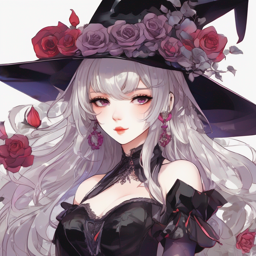

In [4]:
prompt ="Best quality, masterpiece, colorful, dynamic angle, highest detailed, solo, female, a beautiful shadow witch, eyes: purple eyes, pale skin, pouty red lips, full round breasts, thin waist, broad hips, long legs, long black hair, crooked black witch hat with black roses on the brim"
negative_prompt="bad photo, bad photography, worst quality, low quality, blurry, bad teeth, deformed teeth, deformed lips, bad anatomy, bad proportions, deformed iris, deformed pupils, deformed eyes, bad eyes, deformed face, ugly face, deformed hands, fused fingers, morbid, mutilated, mutation, disfigured,lowres, bad anatomy, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
image = pipe(prompt,negative_prompt=negative_prompt, num_inference_steps=25).images[0]
image.resize((256, 256)) # Small preview

## CLIP Score

CLIP let's us compute a "similarity score" between an image and a prompt. While not perfect, this is a good measure for how well an image generating model is doing at matching the prompt. Important caveats:
- CLIP is great for objects, not so good at actions (verbs)
- CLIP can't really count, or keep track of placement

Calculating a CLIP score for a text-image pair is relatively simple:

In [5]:
from transformers import CLIPProcessor, CLIPModel

# Load the clip model and processor
clip_model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16")
clip_processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")

# Preprocess the input text(s) and image(s)
inputs = clip_processor(text=[prompt], images=image, return_tensors="pt", padding=True)

# Inspect the outputs
outputs = clip_model(**inputs)
outputs.logits_per_image # A similarity score

config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

tensor([[36.9583]], grad_fn=<TBackward0>)

A score of 35 indicates a pretty good match (depending on the CLIP model variant and lots of other factors). Compare this with what we get if the model produced that same image after being prompted to produce a flower:

In [6]:
# Compare to an unrelated prompt
inputs = clip_processor(text=["A pretty flower"], images=image, return_tensors="pt", padding=True)
clip_model(**inputs).logits_per_image # Much lower similarity score

tensor([[24.0424]], grad_fn=<TBackward0>)